In [215]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Step 1 - Cleaning the data

### Load the data

In [216]:
df = pd.read_csv("credit card clients.csv")
df.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


### Remove first column and rename the second data column as first colunmn

In [217]:
credit_df = df.rename(columns=df.iloc[0])
credit_df.drop(index=df.index[0], axis=0, inplace=True)
credit_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


### Check for column names

In [218]:
credit_df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

### Inspect the data

In [219]:
credit_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [220]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 1 to 30000
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          30000 non-null  object
 1   LIMIT_BAL                   30000 non-null  object
 2   SEX                         30000 non-null  object
 3   EDUCATION                   30000 non-null  object
 4   MARRIAGE                    30000 non-null  object
 5   AGE                         30000 non-null  object
 6   PAY_0                       30000 non-null  object
 7   PAY_2                       30000 non-null  object
 8   PAY_3                       30000 non-null  object
 9   PAY_4                       30000 non-null  object
 10  PAY_5                       30000 non-null  object
 11  PAY_6                       30000 non-null  object
 12  BILL_AMT1                   30000 non-null  object
 13  BILL_AMT2                   30000 non-null  ob

In [221]:
credit_df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,...,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000
unique,30000,81,2,7,4,56,11,11,11,11,...,21548,21010,20604,7943,7899,7518,6937,6897,6939,2
top,1,50000,2,2,2,29,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
freq,1,3365,18112,14030,15964,1605,14737,15730,15764,16455,...,3195,3506,4020,5249,5396,5968,6408,6703,7173,23364


### Correct the datatypes

In [222]:
credit_df['SEX'] = credit_df['SEX'].astype('category')
credit_df['EDUCATION'] = credit_df['EDUCATION'].astype('category')
credit_df['MARRIAGE'] = credit_df['MARRIAGE'].astype('category')

### Check for missing values

In [223]:
credit_df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

## Step 2 - Data Preprocessing

* Data preprocessing is the process of cleaning, transforming, and organizing raw data into a format suitable for analysis and modeling. This may include tasks such as handling missing values, scaling or normalizing features, encoding categorical variables, and splitting the data into training and testing sets.

### Feature Scaling
* Feature scaling is a technique used to standardize or normalize the range of independent variables or features in a dataset. It ensures that all features have similar scales, preventing certain features from dominating the model training process. Common methods include Standardization (scaling features to have zero mean and unit variance) and Min-Max Scaling (scaling features to a specified range, often between 0 and 1).

In [224]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(credit_df.drop(columns=['ID', 'default payment next month']))
df_scaled = pd.DataFrame(scaled_features, columns = credit_df.columns[1:-1])
df_scaled['default payment next month'] = credit_df['default payment next month']
df_scaled.dropna(inplace = True)

### Step 3 - Exploratory data analysis and visualization
* Exploratory data analysis (EDA) is the process of analyzing and visualizing data to understand its main characteristics, identify patterns, and uncover insights. It involves summarizing key features of the dataset, such as its distribution, central tendency, and variability, as well as exploring relationships between variables through visualization techniques like histograms, scatter plots, box plots, and correlation matrices. 

### Visualising Distributions

### Visualise Age

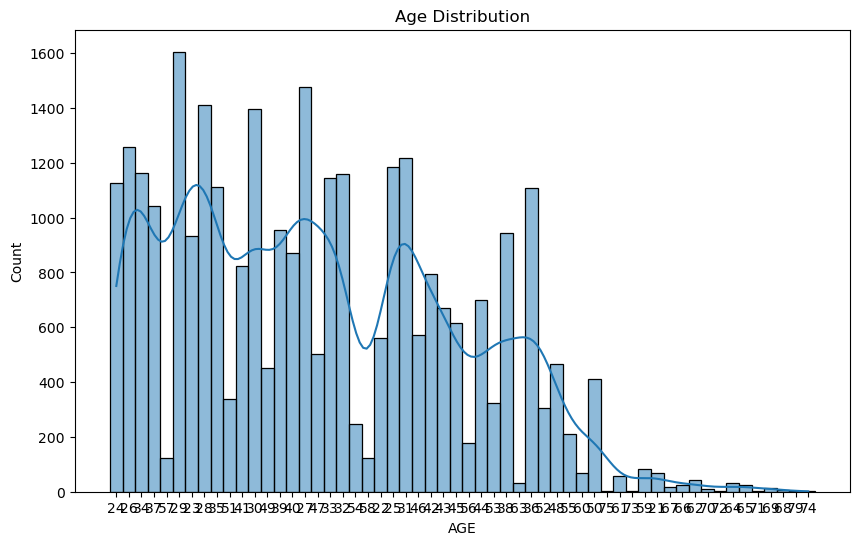

In [225]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(credit_df['AGE'], bins=30, kde=True)
plt.title('Age Distribution')
plt.show()


### Visualise SEX

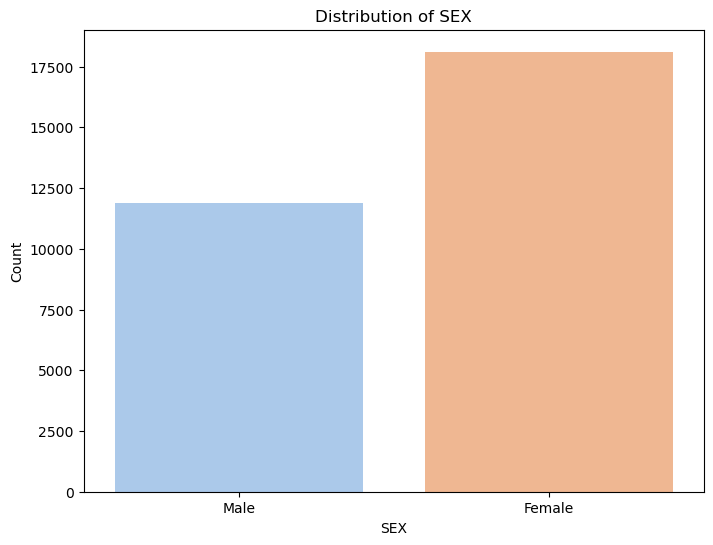

In [226]:
# Plot the distribution for "SEX"
plt.figure(figsize=(8, 6))
sns.countplot(x='SEX', data=credit_df, palette='pastel')
plt.title('Distribution of SEX')
plt.xlabel('SEX')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Male', 'Female'])
plt.show()

### Visualise Marriage

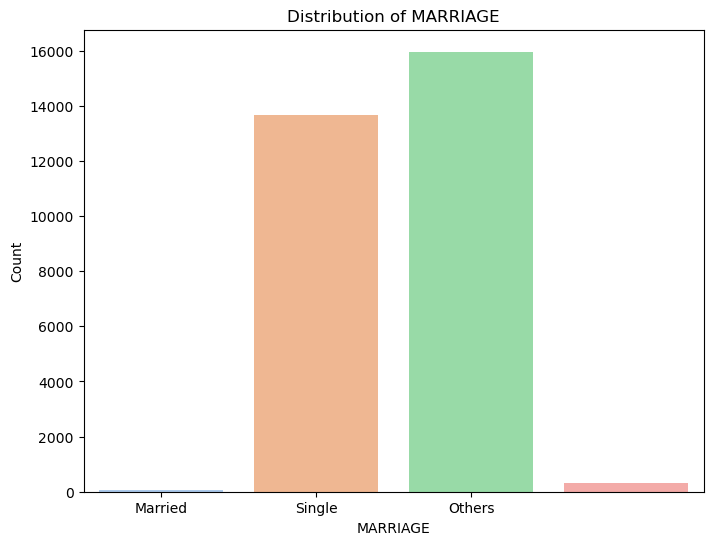

In [227]:
plt.figure(figsize=(8, 6))
sns.countplot(x='MARRIAGE', data=credit_df, palette='pastel')
plt.title('Distribution of MARRIAGE')
plt.xlabel('MARRIAGE')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1, 2], labels=['Married', 'Single', 'Others'])
plt.show()


### Visualise Default Paymment

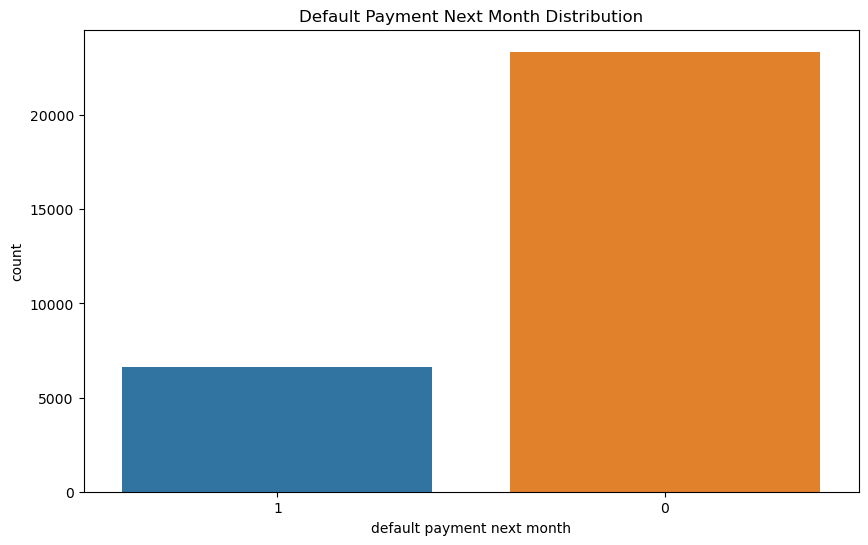

In [228]:
plt.figure(figsize=(10, 6))
sns.countplot(x='default payment next month', data=credit_df)
plt.title('Default Payment Next Month Distribution')
plt.show()


## Step 4 - Model Training
* 
Model training is the process of teaching a machine learning algorithm to make predictions by adjusting its parameters based on labeled training data.

### Split the data

In [229]:
from sklearn.model_selection import train_test_split

# Setup random seed
np.random.seed(42)

# Make the data
x = df_scaled.drop("default payment next month", axis = 1)
y = df_scaled["default payment next month"]

# Split the data
x_train,x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

### Train a DecesionTreeClassifier model

In [231]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Create the model object
clf = DecisionTreeClassifier()

# Train the model on train set
clf.fit(x_train, y_train)

# Check the model on test set
clf.score(x_test, y_test)

0.6505555555555556

### Predict on the test set

In [232]:
y_pred = clf.predict(x_test)
y_pred_proba = clf.predict_proba(x_test)[:, 1]

## Step 5 - Evaluate the Model
* Accuracy: Measures the proportion of correctly predicted instances out of all instances.
* Error Rate: Represents the proportion of incorrectly predicted instances.
* AUC-ROC: Indicates the area under the Receiver Operating Characteristic curve, which measures the model's ability to distinguish between classes.
* R-squared: Measures the proportion of the variance in the dependent variable that is predictable from the independent variables.
* Classification Report: Provides a detailed summary of classification metrics such as precision, recall, and F1-score for each class, as well as overall accuracy and other statistics.

In [233]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

accuracy = accuracy_score(y_test, y_pred)
error_rate = 1 - accuracy
roc_auc = roc_auc_score(y_test, y_pred_proba)
r_squared = clf.score(x_test, y_test) 

print(f"Accuracy: {accuracy:.2f}")
print(f"Error Rate: {error_rate:.2f}")
print(f"AUC-ROC: {roc_auc:.2f}")
print(f"R-squared: {r_squared:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.65
Error Rate: 0.35
AUC-ROC: 0.51
R-squared: 0.65

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.76      0.77      7032
           1       0.23      0.25      0.24      1968

    accuracy                           0.65      9000
   macro avg       0.51      0.51      0.51      9000
weighted avg       0.66      0.65      0.66      9000



## Step 6 - Using hyperparameters for tuning and improve the model perfomance
* Hyperparameters are parameters that are set before the learning process begins. Unlike model parameters, which are learned during training, hyperparameters are not directly learned from the data but rather specified by the practitioner. They govern the behavior of the learning algorithm and significantly impact the performance and behavior of the model.


In [234]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit GridSearchCV
grid_search.fit(x_train, y_train)

# Get the best parameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Predict on the test set using the best model
y_pred = best_model.predict(x_test)
y_pred_proba = best_model.predict_proba(x_test)[:, 1]

# Evaluate the best model
best_accuracy = accuracy_score(y_test, y_pred)
best_error_rate = 1 - accuracy
best_roc_auc = roc_auc_score(y_test, y_pred_proba)
best_r_squared = best_model.score(x_test, y_test)

# Print evaluation metrics
print(f"Best Parameters: {best_params}")
print(f"Accuracy: {best_accuracy:.2f}")
print(f"Error Rate: {best_error_rate:.2f}")
print(f"AUC-ROC: {best_roc_auc:.2f}")
print(f"R-squared: {best_r_squared:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Fitting 5 folds for each of 90 candidates, totalling 450 fits
Best Parameters: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy: 0.78
Error Rate: 0.35
AUC-ROC: 0.51
R-squared: 0.78


C:\Users\fr2071tu\sample_project\env\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fr2071tu\sample_project\env\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Classification Report:
               precision    recall  f1-score   support

           0       0.78      1.00      0.88      7032
           1       0.00      0.00      0.00      1968

    accuracy                           0.78      9000
   macro avg       0.39      0.50      0.44      9000
weighted avg       0.61      0.78      0.69      9000



C:\Users\fr2071tu\sample_project\env\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Part 2 - Implementation of  neural network  (Multi Layer Perceptron) .
* A multilayer perceptron (MLP) is a type of feedforward artificial neural network consisting of multiple layers of interconnected neurons, including input, hidden, and output layers. It is a powerful and versatile model capable of learning complex nonlinear relationships in data, making it widely used for tasks such as classification, regression, and pattern recognition.

In [197]:
# Scaling 
scaler = StandardScaler()
scaled_features = scaler.fit_transform(credit_df.drop(columns=['ID', 'default payment next month']))
df_scaled = pd.DataFrame(scaled_features, columns = credit_df.columns[1:-1])
df_scaled['default payment next month'] = credit_df['default payment next month']
df_scaled.dropna(inplace = True)


# Define feature matrix X and target vector y
X = credit_df.drop(columns=['ID', 'default payment next month'])
y = credit_df['default payment next month']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the MLP Classifier
mlp = MLPClassifier(max_iter=500, random_state=42)

### Parameter Grid for MLP
* Parameter grid in MLP refers to a predefined set of hyperparameter values, such as the number of hidden layers and neurons, activation functions, and learning rates, which are systematically searched during hyperparameter tuning to find the optimal combination for model performance optimization.

In [198]:
from sklearn.neural_network import MLPClassifier

param_grid_mlp = {
    'hidden_layer_sizes': [(50, 50), (100,), (100, 50)],
    'activation': ['tanh', 'relu'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant', 'adaptive'],
}

### Initializie Fit and GridSearch for MLP

In [199]:
# Initialize GridSearchCV for MLP Classifier
grid_search_mlp = GridSearchCV(estimator=mlp, param_grid=param_grid_mlp, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit GridSearchCV for MLP Classifier
grid_search_mlp.fit(X_train, y_train)


Fitting 5 folds for each of 48 candidates, totalling 240 fits


C:\Users\fr2071tu\sample_project\env\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
4 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\fr2071tu\sample_project\env\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\fr2071tu\sample_project\env\lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\fr2071tu\sample_project\env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 753, in fit
   

GridSearchCV(cv=5, estimator=MLPClassifier(max_iter=500, random_state=42),
             n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': [(50, 50), (100,), (100, 50)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['adam', 'sgd']},
             scoring='accuracy', verbose=2)

### Best MLP Model and Parameters:

In [201]:
best_params_mlp = grid_search_mlp.best_params_
best_model_mlp = grid_search_mlp.best_estimator_

### Predict on the test set using the best MLP model

In [202]:
y_pred_mlp = best_model_mlp.predict(X_test)
y_pred_proba_mlp = best_model_mlp.predict_proba(X_test)[:, 1]

### Evaluate the model

In [203]:
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
error_rate_mlp = 1 - accuracy_mlp
roc_auc_mlp = roc_auc_score(y_test, y_pred_proba_mlp)
r_squared_mlp = best_model_mlp.score(X_test, y_test)


### Evaluation metrics for MLP

In [204]:
print(f"Best Parameters for MLP: {best_params_mlp}")
print(f"Accuracy (MLP): {accuracy_mlp:.2f}")
print(f"Error Rate (MLP): {error_rate_mlp:.2f}")
print(f"AUC-ROC (MLP): {roc_auc_mlp:.2f}")
print(f"R-squared (MLP): {r_squared_mlp:.2f}")
print("\nClassification Report (MLP):\n", classification_report(y_test, y_pred_mlp))


Best Parameters for MLP: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'solver': 'adam'}
Accuracy (MLP): 0.78
Error Rate (MLP): 0.22
AUC-ROC (MLP): 0.60
R-squared (MLP): 0.78

Classification Report (MLP):
               precision    recall  f1-score   support

           0       0.78      1.00      0.88      4687
           1       1.00      0.00      0.00      1313

    accuracy                           0.78      6000
   macro avg       0.89      0.50      0.44      6000
weighted avg       0.83      0.78      0.69      6000



##  Conclusion
* Based on the accuracy rate, error rate, ROC AUC score, mean squared error, and R-squared, we can compare the Classification Trees method with the Neural Network method to determine which model performs better on this dataset.

In [210]:
# Create a DataFrame for Classification Trees results
classification_trees_results = pd.DataFrame({
    'Metric': ['Accuracy Rate', 'Error Rate', 'ROC AUC', 'R-Squared'],
    'Value': [accuracy, error_rate, roc_auc, r_squared]
})

# Display the results
print("Classification Trees Results:")
print(classification_trees_results)


Classification Trees Results:
          Metric     Value
0  Accuracy Rate  0.781333
1     Error Rate  0.218667
2        ROC AUC  0.508510
3      R-Squared  0.781333


In [212]:
#Create a DataFrame for a tuned Classification tree results
Tuned_classification_trees_results = pd.DataFrame({
    'Metric': ['Accuracy Rate', 'Error Rate', 'ROC AUC', 'R-Squared'],
    'Value': [best_accuracy, best_error_rate, best_roc_auc, best_r_squared]
})

# Display the results
print("Tuned_classification_trees_results")
print(Tuned_classification_trees_results)

Tuned_classification_trees_results
          Metric     Value
0  Accuracy Rate  0.819167
1     Error Rate  0.218667
2        ROC AUC  0.752661
3      R-Squared  0.819167


In [209]:
# Create a DataFrame for Neural Networks results
neural_network_results = pd.DataFrame({
    'Metric': ['Accuracy', 'Error Rate', 'ROC AUC', 'R-Squared'],
    'Value': [accuracy_mlp, error_rate_mlp, roc_auc_mlp, r_squared_mlp]
})

print("neural_network_results:")
print(neural_network_results)

neural_network_results:
       Metric     Value
0    Accuracy  0.781333
1  Error Rate  0.218667
2     ROC AUC  0.595142
3   R-Squared  0.781333


In [213]:
results = pd.DataFrame({
    'Model': ['Decision Tree', 'Tuned Decision Tree', 'Neural Network'],
    'Accuracy': [accuracy, best_accuracy, accuracy_mlp],
    'Error Rate': [error_rate, best_error_rate, error_rate_mlp],
    'ROC AUC': [roc_auc, best_roc_auc, roc_auc_mlp],
    'R-Squared': [r_squared, best_r_squared, r_squared_mlp]
})

print(results)


                 Model  Accuracy  Error Rate   ROC AUC  R-Squared
0        Decision Tree  0.781333    0.218667  0.508510   0.781333
1  Tuned Decision Tree  0.819167    0.218667  0.752661   0.819167
2       Neural Network  0.781333    0.218667  0.595142   0.781333
